In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

In [2]:
#Load the data
tweets_df = pd.read_csv('Apple-Twitter-Sentiment-DFE.csv')

In [3]:
tweets_df   #df=dataframe

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,True,golden,10,NaN,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...
3,623495516,True,golden,17,NaN,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...
4,623495517,False,finalized,3,12-12-2014 12:14,3,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL
...,...,...,...,...,...,...,...,...,...,...,...,...
3881,623499442,True,golden,13,NaN,3,0.7757,Tue Dec 09 22:08:53 +0000 2014,5.420000e+17,#AAPL OR @Apple,5\n3,(Via FC) Apple Is Warming Up To Social Media -...
3882,623499450,True,golden,16,NaN,3,0.6225,Tue Dec 09 22:18:27 +0000 2014,5.420000e+17,#AAPL OR @Apple,3\n1,RT @MMLXIV: there is no avocado emoji may I as...
3883,623499486,True,golden,14,NaN,5,0.9347,Tue Dec 09 23:45:59 +0000 2014,5.420000e+17,#AAPL OR @Apple,5,@marcbulandr I could not agree more. Between @...
3884,623499514,True,golden,13,NaN,1,0.9230,Wed Dec 10 00:48:10 +0000 2014,5.420000e+17,#AAPL OR @Apple,1,My iPhone 5's photos are no longer downloading...


In [15]:
df = pd.DataFrame(['sentiment:confidence'])
df.loc[df.sentiment:confidence>0.5, 'sentiment:confidence'] = 1

AttributeError: 'DataFrame' object has no attribute 'sentiment'

In [5]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _unit_id              3886 non-null   int64  
 1   _golden               3886 non-null   bool   
 2   _unit_state           3886 non-null   object 
 3   _trusted_judgments    3886 non-null   int64  
 4   _last_judgment_at     3783 non-null   object 
 5   sentiment             3886 non-null   object 
 6   sentiment:confidence  3886 non-null   float64
 7   date                  3886 non-null   object 
 8   id                    3886 non-null   float64
 9   query                 3886 non-null   object 
 10  sentiment_gold        103 non-null    object 
 11  text                  3886 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 337.9+ KB


In [6]:
tweets_df.describe()

,_unit_id,_trusted_judgments,sentiment:confidence,id
count,3.886000e+03,3886.000000,3886.000000,3.886000e+03
mean,6.234975e+08,3.687082,0.829526,5.410039e+17
std,1.171906e+03,2.004595,0.175864,7.942752e+14
min,6.234955e+08,3.000000,0.332700,5.400000e+17
25%,6.234965e+08,3.000000,0.674475,5.400000e+17
50%,6.234975e+08,3.000000,0.811250,5.410000e+17
75%,6.234984e+08,3.000000,1.000000,5.420000e+17
max,6.235173e+08,27.000000,1.000000,5.420000e+17


In [7]:
tweets_df['text']

0       #AAPL:The 10 best Steve Jobs emails ever...htt...
1       RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2       My cat only chews @apple cords. Such an #Apple...
3       I agree with @jimcramer that the #IndividualIn...
4            Nobody expects the Spanish Inquisition #AAPL
                              ...                        
3881    (Via FC) Apple Is Warming Up To Social Media -...
3882    RT @MMLXIV: there is no avocado emoji may I as...
3883    @marcbulandr I could not agree more. Between @...
3884    My iPhone 5's photos are no longer downloading...
3885    RT @SwiftKey: We're so excited to be named to ...
Name: text, Length: 3886, dtype: object

In [8]:
#Drop the _unit_id, id & date columns
tweets_df = tweets_df.drop(['_unit_id','id','date'], axis=1)

In [9]:
tweets_df

,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,query,sentiment_gold,text
0,True,golden,10,NaN,3,0.6264,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,True,golden,12,NaN,3,0.8129,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,True,golden,10,NaN,3,1.0000,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...
3,True,golden,17,NaN,3,0.5848,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...
4,False,finalized,3,12-12-2014 12:14,3,0.6474,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL
...,...,...,...,...,...,...,...,...,...
3881,True,golden,13,NaN,3,0.7757,#AAPL OR @Apple,5\n3,(Via FC) Apple Is Warming Up To Social Media -...
3882,True,golden,16,NaN,3,0.6225,#AAPL OR @Apple,3\n1,RT @MMLXIV: there is no avocado emoji may I as...
3883,True,golden,14,NaN,5,0.9347,#AAPL OR @Apple,5,@marcbulandr I could not agree more. Between @...
3884,True,golden,13,NaN,1,0.9230,#AAPL OR @Apple,1,My iPhone 5's photos are no longer downloading...


# Perform DATA Explorations

<AxesSubplot:>

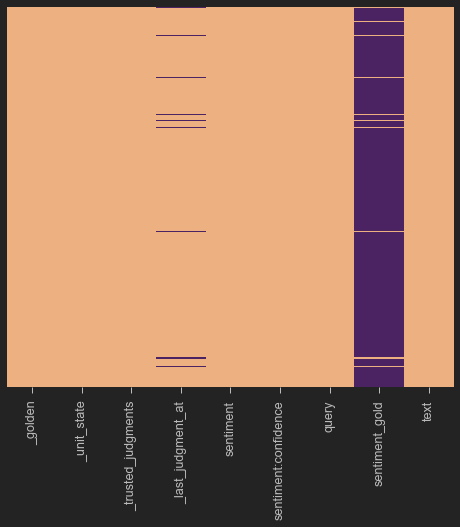

In [10]:
sns.heatmap(tweets_df.isnull(), yticklabels=False, cbar = False, cmap='flare')

array([[<AxesSubplot:title={'center':'_trusted_judgments'}>,
        <AxesSubplot:title={'center':'sentiment:confidence'}>]],
      dtype=object)

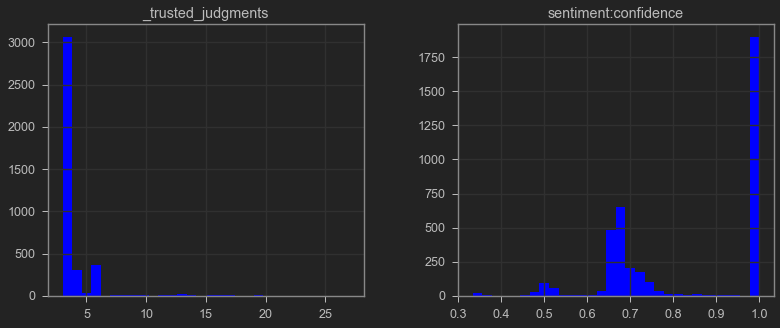

In [11]:
#Plot the histogram
tweets_df.hist(bins = 30, figsize=(13,5), color = 'blue')

In [12]:
tweets_df.columns

Index(['_golden', '_unit_state', '_trusted_judgments', '_last_judgment_at',
       'sentiment', 'sentiment:confidence', 'query', 'sentiment_gold', 'text'],
      dtype='object')

In [13]:
#Get the length of the messages
tweets_df['length'] = tweets_df['text'].apply(len)

In [14]:
tweets_df

,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,query,sentiment_gold,text,length
0,True,golden,10,NaN,3,0.6264,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...,65
1,True,golden,12,NaN,3,0.8129,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...,94
2,True,golden,10,NaN,3,1.0000,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...,51
3,True,golden,17,NaN,3,0.5848,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...,136
4,False,finalized,3,12-12-2014 12:14,3,0.6474,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL,44
...,...,...,...,...,...,...,...,...,...,...
3881,True,golden,13,NaN,3,0.7757,#AAPL OR @Apple,5\n3,(Via FC) Apple Is Warming Up To Social Media -...,140
3882,True,golden,16,NaN,3,0.6225,#AAPL OR @Apple,3\n1,RT @MMLXIV: there is no avocado emoji may I as...,58
3883,True,golden,14,NaN,5,0.9347,#AAPL OR @Apple,5,@marcbulandr I could not agree more. Between @...,134
3884,True,golden,13,NaN,1,0.9230,#AAPL OR @Apple,1,My iPhone 5's photos are no longer downloading...,129


In [15]:
tweets_df.describe()

,_trusted_judgments,sentiment:confidence,length
count,3886.000000,3886.000000,3886.000000
mean,3.687082,0.829526,102.525219
std,2.004595,0.175864,32.562847
min,3.000000,0.332700,11.000000
25%,3.000000,0.674475,80.000000
50%,3.000000,0.811250,107.000000
75%,3.000000,1.000000,134.000000
max,27.000000,1.000000,148.000000


In [16]:
#View the longest message
tweets_df[tweets_df['length'] == 148]['text']

2153    #AAPL $BABA &amp; $TWTR are having their 9 &am...
2974    #aapl might invest in #Tsla to increase R&amp;...
Name: text, dtype: object

In [17]:
#View the mean message
tweets_df[tweets_df['length'] == 102]['text']

340     #Apple Should Fight New Court Case Over #Steve...
430     Yes @apple, now is a perfect time to lock my s...
511     Where da fuck is this middle finger emoji @app...
722     @Apple fix your apps.... If I click play it ai...
737     @Apple [#Apple] #sales soar after launch of #i...
751     #Apple's Eddy Cue Talks About Price-Fixing On ...
753     #SteveJobs' Emails Show How He Wanted To Smear...
791     http://t.co/N87ZYWyaKQ #YotaPhone2 is the futu...
889     @Apple pls let me know when yr sorti out probl...
1036    iPhone 6 and 6 Plus Shipping Times Improve to ...
1038    Is #Apple The Most Important Stock On Earth? -...
1127    @Google Chrome Books OVERTAKE @Apple devices i...
1136    Type More Than 100 Words Per Minute With the N...
1195    @wastwater1 l agree with you, they're about as...
1722    #Sketchy #Rumor Claims @Apple [#Apple] Plannin...
1880    @YeagerBeats is back with another #HowTo @appl...
1928    @OneRepublic @Apple that looks amazing, don't ...
1985    The @a

In [18]:
#Print a particular number of tweet using index of iloc
tweets_df[tweets_df['length'] == 102]['text'].iloc[0]

"#Apple Should Fight New Court Case Over #SteveJobs' DRM Decision - Forbes #aapl http://t.co/hmht2MBHIo"

<AxesSubplot:>

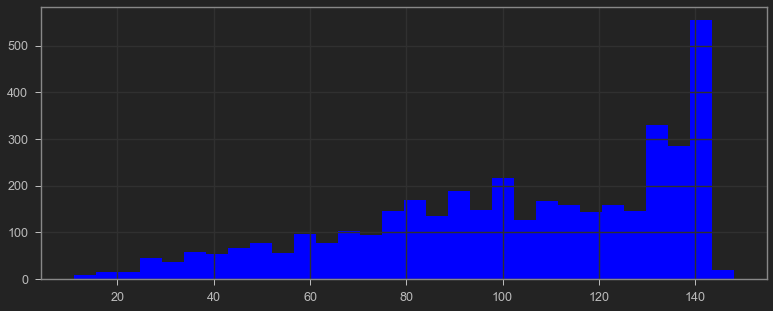

In [19]:
#Plot histogram of the 'length'
tweets_df['length'].hist(bins = 30, figsize=(13,5), color = 'blue')

<AxesSubplot:ylabel='Frequency'>

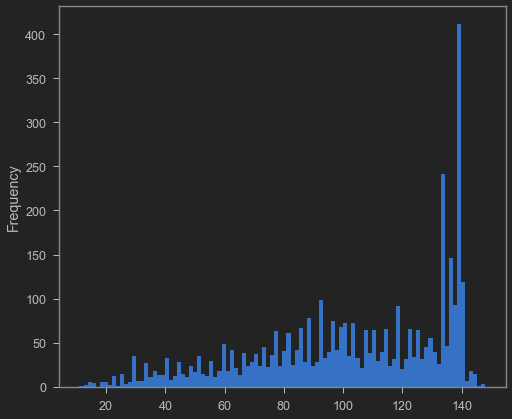

In [20]:
tweets_df['length'].plot(bins = 100, kind = 'hist')

In [21]:
positive = tweets_df[tweets_df['query']==0]
positive

,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,query,sentiment_gold,text,length


In [22]:
negative = tweets_df[tweets_df['query']==1]
negative

,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,query,sentiment_gold,text,length


In [23]:
sentences = tweets_df['text'].tolist()
len(sentences)

3886

In [24]:
sentences_as_one_string =" ".join(sentences)

In [25]:
sentences_as_one_string

"#AAPL:The 10 best Steve Jobs emails ever...http://t.co/82G1kL94tx RT @JPDesloges: Why AAPL Stock Had a Mini-Flash Crash Today $AAPL #aapl\nhttp://t.co/hGFcjYa0E9 My cat only chews @apple cords. Such an #AppleSnob. I agree with @jimcramer that the #IndividualInvestor should own not trade #Apple #AAPL, it's extended so today's pullback is good to see Nobody expects the Spanish Inquisition #AAPL #AAPL:5 Rocket Stocks to Buy for December Gains: Apple and More...http://t.co/eG5XhXdLLS Top 3 all @Apple #tablets. Damn right! http://t.co/RJiGn2JUuB CNBCTV: #Apple's margins better than expected? #aapl http://t.co/7geVrtOGLK Apple Inc. Flash Crash: What You Need to Know http://t.co/YJIgtifdAj #AAPL #AAPL:This Presentation Shows What Makes The World's Biggest Tech Companies ...http://t.co/qlH9PqSoSd WTF MY BATTERY WAS 31% ONE SECOND AGO AND NOW IS 29% WTF IS THIS @apple Apple Watch Tops Search Engine List of Best Wearable Tech http://t.co/LTEzJzqqF8 #AAPL #iWatch #AppleWatch The Best-Designed #i

In [26]:
import sys
print(sys.executable)

C:\Users\nisarg\anaconda3\python.exe


In [2]:
pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp39-cp39-win_amd64.whl size=152743 sha256=2b0da9e5a4176816a047a4b38a8c6448231dae5a7f974c97e742a46645f90f2a
  Stored in directory: c:\users\nisarg\appdata\local\pip\cache\wheels\f9\7a\dd\06ef8b5dfe5483f6204133c08eeb16c287cc2c05e290ae2fc0
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [27]:
from wordcloud import WordCloud

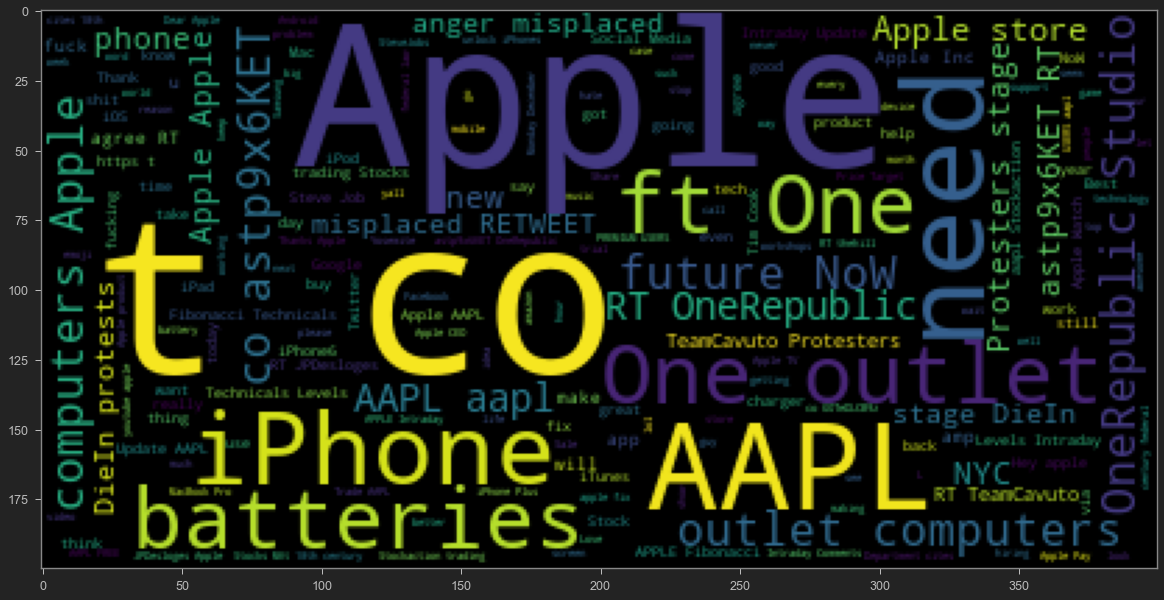

In [28]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

# TASK #6: PERFORM DATA CLEANING - REMOVE PUNCTUATION FROM TEXT

In [29]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
Test = '$I love AI & Machine learning!!'

In [31]:
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'
Test_punc_removed = [char for char in Test if char not in string.punctuation     ]
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Machine learning and AI'

In [32]:
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'

In [33]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed

['G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'h',
 'a',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'u',
 'n',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'M',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'A',
 'I']

In [34]:
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Machine learning and AI'

# # TASK 7: PERFORM DATA CLEANING - REMOVE STOPWORDS

In [35]:
import nltk # Natural Language tool kit 
nltk.download('stopwords')

# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nisarg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
Test_punc_removed_join = 'I enjoy coding, programming and Artificial intelligence'
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [37]:
Test_punc_removed_join_clean # Only important (no so common) words are left

['enjoy', 'coding,', 'programming', 'Artificial', 'intelligence']

In [38]:
Test_punc_removed_join

'I enjoy coding, programming and Artificial intelligence'

# TASK 8: PERFORM COUNT VECTORIZATION (TOKENIZATION)

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']


In [40]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [41]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


In [42]:
print(X.toarray())  

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


# TASK #8: CREATE A PIPELINE TO REMOVE PUNCTUATIONS, STOPWORDS AND PERFORM COUNT VECTORIZATION

In [43]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [44]:
# Let's test the newly added function
tweets_df_clean = tweets_df['text'].apply(message_cleaning)

In [45]:
print(tweets_df_clean[5]) # show the cleaned up version

['AAPL5', 'Rocket', 'Stocks', 'Buy', 'December', 'Gains', 'Apple', 'MorehttptcoeG5XhXdLLS']


In [48]:
print(tweets_df['text'][5]) # show the original version

#AAPL:5 Rocket Stocks to Buy for December Gains: Apple and More...http://t.co/eG5XhXdLLS


In [49]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['text'])

In [50]:
print(vectorizer.get_feature_names())

['0', '00', '0144', '02', '03', '04', '05', '07', '08', '09', '099', '0g', '1', '10', '100', '1000', '10000000000', '1009am', '10101', '10102', '1014', '101Baemations', '1020', '1031', '1049', '105109', '108', '109', '10thmost', '10yrs', '11', '110', '111', '111155', '1124', '113', '1133', '113535', '11463', '1149801', '115', '1154', '11549', '11593', '11595', '116', '118', '11am', '11th', '11x', '12', '12000', '12022014', '1211', '121114', '1215', '1224', '122Inch', '127', '128', '128GB', '128g', '128gb', '12Inch', '13', '130', '13000', '1315066', '1337sh', '135', '13500', '1375', '13in', '14', '140', '14000', '140145s', '142', '143', '144', '14th', '15', '150', '15000', '1522sh', '154', '157sh', '15x', '16', '161', '161M', '1645', '165', '1679sh', '169', '16GB', '16gb', '17', '170', '1720', '18', '1836sh', '185sh', '18th', '19', '1984', '1989', '1996', '19YearOld', '1Alabama', '1B', '1Taiwan', '1bn', '1mm', '1on', '1s', '1st', '2', '20', '200', '20000mph', '2000httptcoYag6HUnBTa', '2

In [51]:
print(tweets_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [52]:
print(tweets_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [53]:
tweets_countvectorizer.shape

(3886, 10185)

In [54]:
X = pd.DataFrame(tweets_countvectorizer.toarray())

In [55]:
X

,0,1,2,3,4,5,6,7,8,9,...,10175,10176,10177,10178,10179,10180,10181,10182,10183,10184
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3882,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3883,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
y = tweets_df['text']

# TASK #10: UNDERSTAND THE THEORY AND INTUITION BEHIND NAIVE BAYES

# Naive Bayes 1: Prior probability: 
   For red, probability = (Total red/Total points)

# For blue, probability = (Total blue/Total points)

# Naive Bayes2: Likelihood:
    For the nwe pount, if there are more blue pounts in the vicinity, then it is more likely that the new point is classifies as a blue point.
    So, we draw a circle around the new point & calculate the no. of points in that circle belonging to each class

# Naive Bayes 3: Posterior probability:
    Combine prior probability & likelihood 
    Prior suggests that the point will be blue because there are more blue points
    Likelihood suggests that point will be red beacause there are more red points in its vicinity
    Bayes' rule combine both to obtain posterior probability

# Naive Bayes Math:
    P(Retire|X) = [P(X|Retire) * P(Retire)]/P(X)
    
    P(X|Retire) = Likelihood
    P(Retire)   = Prior probability
    P(X)        = Marginal likelihood
    

# X: New customer's features, suchas age, savings
    P(Retire|X) = Probability of a customer retiring given his/her features, such as age & savings
    P(retire) = Prior probability of retiring, without any prior knowledge
    P(X|Retire) = Likelihood
    P(X) = Marginal likelihood - Probability of any point added lies into the circle

# TASK #11: TRAIN AND EVALUATE A NAIVE BAYES CLASSIFIER MODEL

In [57]:
X.shape

(3886, 10185)

In [58]:
y.shape

(3886,)

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [60]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

# Confusion Matrix Explanation

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

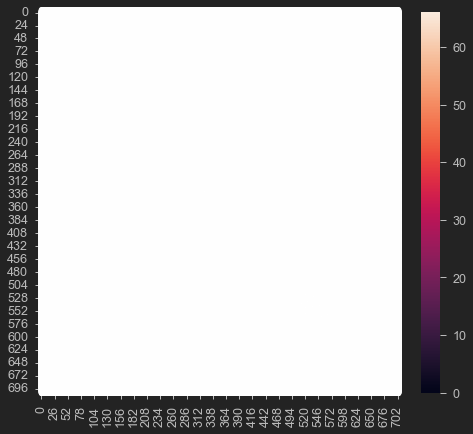

In [62]:
# Predicting the Test set results
#Testing the Machine learning model
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [63]:
print(classification_report(y_test, y_predict_test))

                                                                                                                                                  precision    recall  f1-score   support

 #AAPL 115.93. Dec1 #MiniFlash #Crash 6.4% in one crazy minute w/ 6.7M shares. $MS downgrade to Market Weight &amp; trim its stock from 4% to 3%       0.00      0.00      0.00         1
                                                       #AAPL Market Cap Passes $700 Billion, Tablet Sales Slump and More  http://t.co/gWDMiYag9o       0.00      0.00      0.00         1
           #AAPL Shorting Apple @ 116 $. Love the company, love their products, everybody admires Apple, but the capitalization is way too wild.       0.00      0.00      0.00         1
      #AAPL moving towards the #IoT and more connectivity in your everyday life. RT @businessinsider: THE FUTURE OF APPLE http://t.co/ZiKLflrHpm       0.00      0.00      0.00         1
                                           #AAPL:12 Under-the-Radar S

C:\Users\nisarg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nisarg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nisarg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nisarg\anaconda3\lib\site-packages\sklearn\metrics\